In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from sklearn import preprocessing

In [2]:
class Model:
    def __init__(self, data, output, learning_rate=0.01):
        """
        :data - Matrix of data: e.g. np.zeros((m, j))
        :output - Actual output for given data: np.zeros((m, 1))
        :theta - Vector of thetas
        
        where:
            j - number of features
            m - number of examples
        """
        self.data = np.c_[np.ones((len(data), 1)), data] # add bias units
        self.output = output
        self.learning_rate = learning_rate
        self.theta = np.zeros((len(self.data[0]), 1))

    def hypothesis(self, X):
        """
        Returns predicted value depending on X.
        
        :X - column vector of features.
        """
        return np.c_[np.ones((len(X), 1)), X].dot(self.theta)

    def cost_function(self, theta):
        """
        Calculates how wrong the model is
        in terms of its prediction.
        """
        m = len(self.output)

        predictions = np.dot(self.data, theta)
        cost = np.sum(np.square(predictions - self.output)) / (2 * m)
        return cost

    def gradient_descent(self, iterations=100):
        """
        Gradient descent algorithm.
        """
        m = len(self.output)
        J_history = np.zeros((iterations, 1))
        for i in range(iterations):
            prediction = np.dot(self.data, self.theta)
            self.theta = self.theta - self.learning_rate * (self.data.T.dot((prediction - self.output)) / m)
            J_history[i][0] = self.cost_function(self.theta)
        return J_history

In [3]:
def feature_normalization(X):
    X_norm = 0
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    X_norm = X - mu
    X_norm = X_norm / sigma
    return X_norm, mu, sigma

def convert_values(values, sigma, mu):
    return (values - mu) / sigma

In [4]:
data = pd.read_csv("ex1data1.csv")
X = data[["x"]].to_numpy()
y = data[["y"]].to_numpy()

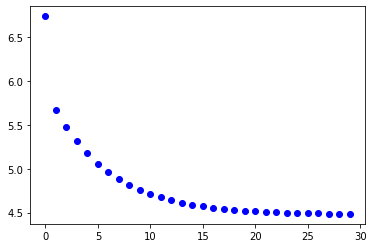

In [5]:
m = Model(X, y, 0.01)
# preprocessing.scale(X) # feature scaling

#scaler = preprocessing.StandardScaler() # mean optimization
#scaler.fit(X)
#scaler.transform(X)
J_history = m.gradient_descent(1500)
plt.plot(J_history[::50], 'bo')  
plt.show()

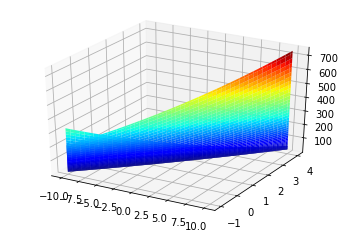

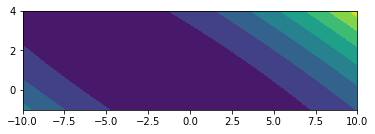

In [6]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta = np.array([[theta0], [theta1]])
        J_vals[i][j] = m.cost_function(theta)

J_vals = J_vals.T

fig = plt.figure()
plt.subplot(211)
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.jet)
plt.show()

plt.subplot(212)
plt.contourf(theta0_vals, theta1_vals, J_vals.T)
plt.show()

In [7]:
print(m.hypothesis([[3.5]]) * 10000)
print(m.hypothesis([[7]]) * 10000)

[[4519.7678677]]
[[45342.45012945]]


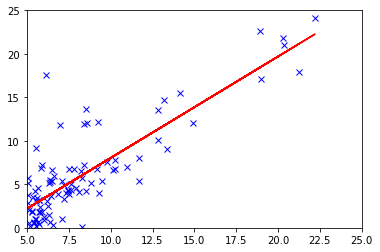

In [8]:
plt.plot(X, y, 'bx', X, m.hypothesis(X), 'r-')
plt.axis([5, 25, 0, 25])
plt.show()

In [9]:
data = pd.read_csv("ex1data2.csv")
X = data[["x1", "x2"]].to_numpy()
y = data[["y"]].to_numpy()

In [10]:
X_n, mu, sigma = feature_normalization(X)

786.2026187430467 0.7528428090618781


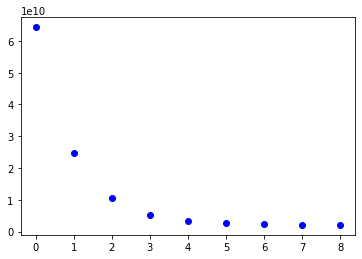

In [11]:
m = Model(X_n, y, 0.01)
J_history = m.gradient_descent(401)
plt.plot(J_history[::50], 'bo')
plt.show()

In [12]:
print(m.theta)

[[334363.16994909]
 [ 99456.68211324]
 [  3224.75942867]]


In [13]:
print(m.hypothesis(convert_values([[1800, 3]], sigma, mu)))

[[308247.42208631]]
